In [47]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
def pre_process_X(data_path):
    dataframes = []
    for file_name in tqdm(os.listdir(data_path), desc = "Reading Data Files"):
        if file_name.endswith(".csv") and not file_name.endswith("ratings.csv"): 
            file_path = os.path.join(data_path, file_name)
            df = pd.read_csv(file_path)
            dataframes.append(df)  

    combined_df = pd.concat(dataframes, ignore_index=True)
    
    return [combined_df, dataframes]

In [49]:
# X, dataframes = pre_process_X('/Users/idansalomon/Documents/University/Masters/Second Year/Applied Project/data')
X = pd.read_csv('/Users/idansalomon/Documents/University/Masters/Second Year/Applied Project/data/huggyllama--llama-7bLayer28Context25-matched-sub-rater-norm_segmentMean.csv.gz')

In [50]:
y = pd.read_csv('/Users/idansalomon/Documents/University/Masters/Second Year/Applied Project/data/huggyllama--llama-7bLayer28Context25-matched_ratings.csv')

In [51]:
X, X.shape

(          sub    episode  segment         0         1         2         3  \
 0     sub-005     s01e01        0 -1.642382 -1.422606 -0.505867  1.102253   
 1     sub-005     s01e01        1 -1.510750 -2.901218  0.617676 -1.086536   
 2     sub-005     s01e01        2 -0.014705 -1.413551  0.458166  0.646868   
 3     sub-005     s01e01        3 -2.337875 -1.566139 -0.836813 -0.474999   
 4     sub-005     s01e01        4 -1.539728 -0.380627 -0.986963 -2.915580   
 ...       ...        ...      ...       ...       ...       ...       ...   
 6418  sub-022  s05e03p03       38 -3.249128 -1.273817 -2.246584  1.443391   
 6419  sub-022  s05e03p03       39 -0.783454 -1.645555  0.390470  0.921552   
 6420  sub-022  s05e03p03       40 -3.909720 -1.319835 -0.514327 -0.596263   
 6421  sub-022  s05e03p03       41 -2.802514 -0.463455 -1.217370 -0.357984   
 6422  sub-022  s05e03p03       42 -3.248704 -0.474624  0.169199 -1.702456   
 
              4         5         6  ...      4086      4087  

In [52]:
y, y.shape

(          sub    episode  segment   start     end  irritation  nostalgia  \
 0     sub-005     s01e01        0    0.00   12.89         1.0        2.0   
 1     sub-005     s01e01        1   12.89   30.34         1.0        2.0   
 2     sub-005     s01e01        2   30.34   45.84         1.0        2.0   
 3     sub-005     s01e01        3   45.84   64.80         2.0        2.0   
 4     sub-005     s01e01        4   64.80   71.63         2.0        1.0   
 ...       ...        ...      ...     ...     ...         ...        ...   
 6418  sub-022  s05e03p03       38  478.31  491.97         3.0        1.0   
 6419  sub-022  s05e03p03       39  491.97  502.08         4.0        1.0   
 6420  sub-022  s05e03p03       40  502.08  515.48         4.0        1.0   
 6421  sub-022  s05e03p03       41  515.48  527.31         3.0        1.0   
 6422  sub-022  s05e03p03       42  527.31     inf         1.0        6.0   
 
       pride  relief  sadness  ...  romance  craving  entrancement  hope  

In [53]:
feelings = y.iloc[:,5:-1].columns
feelings

Index(['irritation', 'nostalgia', 'pride', 'relief', 'sadness', 'satisfaction',
       'surprise', 'sympathy', 'triumph', 'arousal', 'valence', 'contempt',
       'contentment', 'embarrassment', 'empathic_pain', 'envy', 'gratitude',
       'disgust', 'disappointment', 'despair', 'admiration', 'amusement',
       'aesthetic_appreciation', 'anger', 'anxiety', 'awe', 'calmness',
       'confusion', 'excitement', 'fear', 'guilt', 'interest', 'joy',
       'pleasure', 'romance', 'craving', 'entrancement', 'hope', 'boredom',
       'adoration', 'jealousy', 'horror', 'sexual_desire'],
      dtype='object')

In [54]:
full_data = X.merge(y, on= ['sub', 'episode', 'segment'])
full_data

,sub,episode,segment,0,1,2,3,4,5,6,...,romance,craving,entrancement,hope,boredom,adoration,jealousy,horror,sexual_desire,ep_inds
0,sub-005,s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,sub-005,s01e01,1,-1.510750,-2.901218,0.617676,-1.086536,1.499733,0.372000,0.733487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,sub-005,s01e01,2,-0.014705,-1.413551,0.458166,0.646868,0.602337,-0.072865,-0.157339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,sub-005,s01e01,3,-2.337875,-1.566139,-0.836813,-0.474999,3.351325,0.727666,0.650311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,sub-005,s01e01,4,-1.539728,-0.380627,-0.986963,-2.915580,1.390154,2.174287,-0.520417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,sub-022,s05e03p03,38,-3.249128,-1.273817,-2.246584,1.443391,2.033261,-0.282769,-1.010989,...,NaN,NaN,1.0,1.0,NaN,5.0,NaN,1.0,NaN,201
6419,sub-022,s05e03p03,39,-0.783454,-1.645555,0.390470,0.921552,3.462159,1.757881,-0.638646,...,NaN,NaN,1.0,1.0,NaN,3.0,NaN,1.0,NaN,201
6420,sub-022,s05e03p03,40,-3.909720,-1.319835,-0.514327,-0.596263,2.967389,0.997625,-0.698014,...,NaN,NaN,1.0,1.0,NaN,5.0,NaN,1.0,NaN,201
6421,sub-022,s05e03p03,41,-2.802514,-0.463455,-1.217370,-0.357984,2.166234,-0.415941,-0.131396,...,NaN,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,201


In [55]:
most_var_feelings = full_data.loc[:,feelings].var().sort_values(ascending=False)
most_var_feelings[:10]

interest          4.150756
despair           4.015835
excitement        4.014297
nostalgia         3.551537
irritation        3.392934
confusion         3.374530
empathic_pain     3.254367
disappointment    3.238156
contentment       2.925060
satisfaction      2.915007
dtype: float64

In [56]:
most_none_na_feelings = full_data.loc[:,feelings].isna().sum().sort_values(ascending=True)
most_none_na_feelings[:10]

arousal             68
valence             68
anxiety           1213
confusion         1341
amusement         1471
disappointment    1477
interest          1559
despair           1711
sadness           1767
nostalgia         1938
dtype: int64

In [57]:
X

,sub,episode,segment,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,sub-005,s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,...,-0.230230,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290
1,sub-005,s01e01,1,-1.510750,-2.901218,0.617676,-1.086536,1.499733,0.372000,0.733487,...,0.417047,0.498852,-0.580010,-0.631823,-1.941427,2.578685,0.023516,-1.778787,-0.579906,2.462334
2,sub-005,s01e01,2,-0.014705,-1.413551,0.458166,0.646868,0.602337,-0.072865,-0.157339,...,0.514743,0.667308,0.464356,0.223741,-1.584127,2.570256,-0.495372,-1.221611,-0.082853,1.006761
3,sub-005,s01e01,3,-2.337875,-1.566139,-0.836813,-0.474999,3.351325,0.727666,0.650311,...,0.688130,1.884135,-0.508689,-1.440222,-1.878133,3.100491,-0.587111,-0.147499,0.498058,1.589043
4,sub-005,s01e01,4,-1.539728,-0.380627,-0.986963,-2.915580,1.390154,2.174287,-0.520417,...,1.979154,1.300332,1.317830,-3.531636,-0.779142,3.730508,0.118908,-1.300716,-2.469645,3.645489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,sub-022,s05e03p03,38,-3.249128,-1.273817,-2.246584,1.443391,2.033261,-0.282769,-1.010989,...,-1.055635,0.291471,0.428334,-2.879535,-2.761781,1.500756,-0.749149,-0.379969,0.631255,1.901439
6419,sub-022,s05e03p03,39,-0.783454,-1.645555,0.390470,0.921552,3.462159,1.757881,-0.638646,...,0.784055,-0.846143,0.537320,-1.691663,-1.644435,0.396072,-0.590081,-0.970694,1.829574,1.402569
6420,sub-022,s05e03p03,40,-3.909720,-1.319835,-0.514327,-0.596263,2.967389,0.997625,-0.698014,...,-0.294389,1.283604,-0.921861,-2.144126,-1.664755,1.164111,-1.082995,-0.858836,0.358353,1.997608
6421,sub-022,s05e03p03,41,-2.802514,-0.463455,-1.217370,-0.357984,2.166234,-0.415941,-0.131396,...,-0.771001,0.678645,-0.814986,-1.076923,-1.572755,1.328728,-0.082483,-1.039252,-0.387585,1.606128


In [58]:
y[y['valence'].isna()==False]

,sub,episode,segment,start,end,irritation,nostalgia,pride,relief,sadness,...,romance,craving,entrancement,hope,boredom,adoration,jealousy,horror,sexual_desire,ep_inds
0,sub-005,s01e01,0,0.00,12.89,1.0,2.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,sub-005,s01e01,1,12.89,30.34,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,sub-005,s01e01,2,30.34,45.84,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,sub-005,s01e01,3,45.84,64.80,2.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,sub-005,s01e01,4,64.80,71.63,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,sub-022,s05e03p03,38,478.31,491.97,3.0,1.0,1.0,3.0,NaN,...,NaN,NaN,1.0,1.0,NaN,5.0,NaN,1.0,NaN,201
6419,sub-022,s05e03p03,39,491.97,502.08,4.0,1.0,1.0,3.0,NaN,...,NaN,NaN,1.0,1.0,NaN,3.0,NaN,1.0,NaN,201
6420,sub-022,s05e03p03,40,502.08,515.48,4.0,1.0,1.0,4.0,NaN,...,NaN,NaN,1.0,1.0,NaN,5.0,NaN,1.0,NaN,201
6421,sub-022,s05e03p03,41,515.48,527.31,3.0,1.0,1.0,5.0,NaN,...,NaN,NaN,1.0,1.0,NaN,4.0,NaN,1.0,NaN,201


In [59]:
y['sub'].nunique(), y['episode'].nunique(), y['segment'].nunique()

(10, 92, 66)

In [60]:
y[y['valence'].isna()==False].groupby(['sub','episode'])['segment'].nunique()

sub      episode  
sub-005  s01e01       27
         s01e05p01    41
         s01e05p02    31
         s02e04p01    18
         s02e04p02    18
                      ..
sub-022  s04e02p03    36
         s04e02p04    18
         s05e03p01    26
         s05e03p02    34
         s05e03p03    43
Name: segment, Length: 200, dtype: int64

In [61]:
def clean_X_y(X, y, feature):
    train_data = pd.merge(left=X, right=y[y[feature].isna()==False], on=['sub','episode','segment'])
    y_feature = train_data[feature]
    X = train_data.iloc[:,3:4099]
    
    return X, y_feature

In [ ]:
X_vale, y_vale = clean_X_y(X, y, 'valence')
X_vale, y_vale

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vale, y_vale, test_size=0.2, random_state=42)

# Initialize the Lasso model with an alpha value (regularization strength)
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, check the coefficients to see feature importance
print("Lasso Coefficients:")
print(lasso.coef_)

Mean Squared Error: 1.110017881145629
Lasso Coefficients:
[ 0. -0. -0. ... -0.  0. -0.]


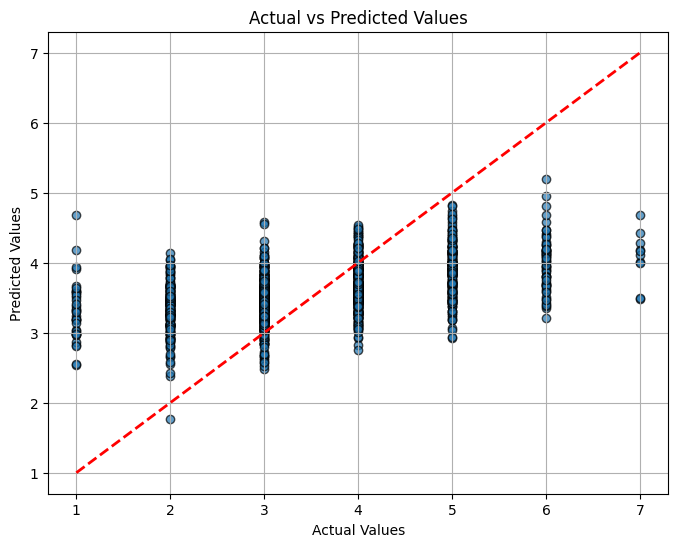

In [18]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


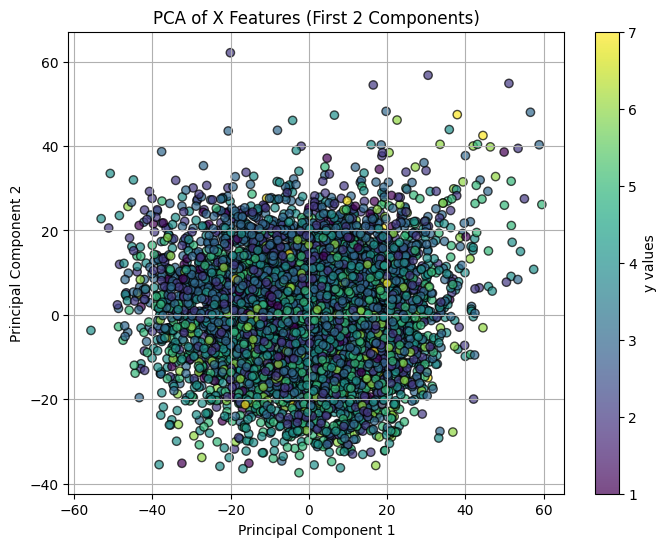

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vale)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_vale, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label="y values")  # Add colorbar to show the y value scale
plt.title("PCA of X Features (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [20]:
X_conf, y_conf = clean_X_y(X, y, 'confusion')

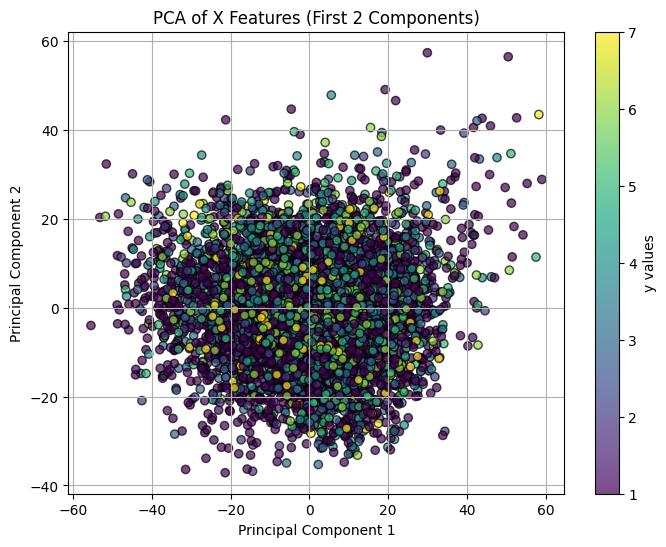

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_conf)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_conf, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label="y values")  # Add colorbar to show the y value scale
plt.title("PCA of X Features (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [22]:
X_int, y_int = clean_X_y(X, y, 'interest')

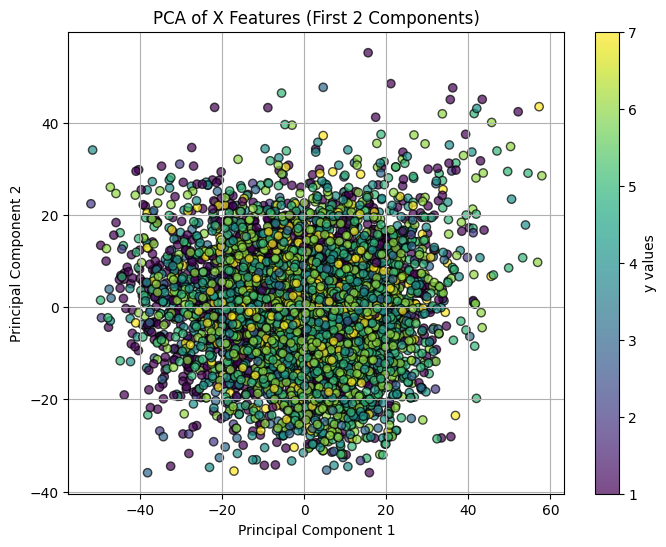

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_int)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_int, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label="y values")  # Add colorbar to show the y value scale
plt.title("PCA of X Features (First 2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
train_data = pd.merge(left=X, right=y[y['valence'].isna()==False], on=['sub','episode','segment'], how='right')
y_feature = train_data['valence']
X_features = train_data.iloc[:,:4099]
full_train_data = X_features
full_train_data['valence'] = y_feature
sub_ep = full_train_data['sub'] + full_train_data['episode']
full_train_data['sub_ep'] = sub_ep
full_train_data.drop(columns=['sub','episode'], inplace=True)
full_train_data

,segment,0,1,2,3,4,5,6,7,8,...,4088,4089,4090,4091,4092,4093,4094,4095,valence,sub_ep
0,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,0.109142,...,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0,sub-005s01e01
1,1,-1.510750,-2.901218,0.617676,-1.086536,1.499733,0.372000,0.733487,2.834233,-1.415132,...,-0.580010,-0.631823,-1.941427,2.578685,0.023516,-1.778787,-0.579906,2.462334,5.0,sub-005s01e01
2,2,-0.014705,-1.413551,0.458166,0.646868,0.602337,-0.072865,-0.157339,0.830948,-0.957331,...,0.464356,0.223741,-1.584127,2.570256,-0.495372,-1.221611,-0.082853,1.006761,3.0,sub-005s01e01
3,3,-2.337875,-1.566139,-0.836813,-0.474999,3.351325,0.727666,0.650311,0.351315,-1.107068,...,-0.508689,-1.440222,-1.878133,3.100491,-0.587111,-0.147499,0.498058,1.589043,4.0,sub-005s01e01
4,4,-1.539728,-0.380627,-0.986963,-2.915580,1.390154,2.174287,-0.520417,1.251019,-1.386791,...,1.317830,-3.531636,-0.779142,3.730508,0.118908,-1.300716,-2.469645,3.645489,1.0,sub-005s01e01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,38,-3.249128,-1.273817,-2.246584,1.443391,2.033261,-0.282769,-1.010989,-0.452222,-1.077356,...,0.428334,-2.879535,-2.761781,1.500756,-0.749149,-0.379969,0.631255,1.901439,4.0,sub-022s05e03p03
6351,39,-0.783454,-1.645555,0.390470,0.921552,3.462159,1.757881,-0.638646,1.640410,-1.607496,...,0.537320,-1.691663,-1.644435,0.396072,-0.590081,-0.970694,1.829574,1.402569,3.0,sub-022s05e03p03
6352,40,-3.909720,-1.319835,-0.514327,-0.596263,2.967389,0.997625,-0.698014,0.335473,-2.407500,...,-0.921861,-2.144126,-1.664755,1.164111,-1.082995,-0.858836,0.358353,1.997608,4.0,sub-022s05e03p03
6353,41,-2.802514,-0.463455,-1.217370,-0.357984,2.166234,-0.415941,-0.131396,-0.628093,-0.496854,...,-0.814986,-1.076923,-1.572755,1.328728,-0.082483,-1.039252,-0.387585,1.606128,5.0,sub-022s05e03p03


In [ ]:
# full_train_data.groupby(['sub_ep']).count()['segment'].mode()

In [ ]:
# full_train_data.groupby(['sub_ep']).count()['segment']

In [ ]:
df = pd.DataFrame({
    'sub_ep': sub_ep  # example values
})
# segments = pd.DataFrame({'segment': range(0, full_train_data['segment'].max())})
segments = pd.DataFrame({'segment': range(0, 30)})

df_new = df.merge(segments, how='cross')
df_new

,sub_ep,segment
0,sub-005s01e01,0
1,sub-005s01e01,1
2,sub-005s01e01,2
3,sub-005s01e01,3
4,sub-005s01e01,4
...,...,...
190645,sub-022s05e03p03,25
190646,sub-022s05e03p03,26
190647,sub-022s05e03p03,27
190648,sub-022s05e03p03,28


In [ ]:
full_data = pd.merge(df_new, full_train_data, on=['sub_ep', 'segment'], how='left')
full_data

,sub_ep,segment,0,1,2,3,4,5,6,7,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,valence
0,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
1,sub-005s01e01,1,-1.510750,-2.901218,0.617676,-1.086536,1.499733,0.372000,0.733487,2.834233,...,0.498852,-0.580010,-0.631823,-1.941427,2.578685,0.023516,-1.778787,-0.579906,2.462334,5.0
2,sub-005s01e01,2,-0.014705,-1.413551,0.458166,0.646868,0.602337,-0.072865,-0.157339,0.830948,...,0.667308,0.464356,0.223741,-1.584127,2.570256,-0.495372,-1.221611,-0.082853,1.006761,3.0
3,sub-005s01e01,3,-2.337875,-1.566139,-0.836813,-0.474999,3.351325,0.727666,0.650311,0.351315,...,1.884135,-0.508689,-1.440222,-1.878133,3.100491,-0.587111,-0.147499,0.498058,1.589043,4.0
4,sub-005s01e01,4,-1.539728,-0.380627,-0.986963,-2.915580,1.390154,2.174287,-0.520417,1.251019,...,1.300332,1.317830,-3.531636,-0.779142,3.730508,0.118908,-1.300716,-2.469645,3.645489,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190645,sub-022s05e03p03,25,-3.368802,-1.168625,-1.623988,1.141665,2.705179,0.205702,-0.056101,0.740033,...,0.895938,0.297039,-0.868683,-1.948437,1.518769,0.475234,-0.721606,0.013559,0.387741,3.0
190646,sub-022s05e03p03,26,-3.078854,-0.897540,-1.865317,0.860678,1.332526,0.734879,0.987280,1.084261,...,0.677287,-0.048803,-1.938879,-2.302598,2.122314,0.009908,-0.078247,1.451206,0.540405,5.0
190647,sub-022s05e03p03,27,-3.074182,-1.486156,-1.575300,-0.221767,1.781733,0.610801,-0.936247,-0.437453,...,1.977351,-0.482382,-0.803905,-1.449822,2.306756,-1.184792,0.518071,1.729419,2.241071,4.0
190648,sub-022s05e03p03,28,-1.662569,-1.197193,-0.786423,-1.078818,2.430765,-0.030440,-1.375141,0.342714,...,1.063792,-1.223109,-2.451150,-2.343965,2.087936,0.342072,-0.382003,2.465623,1.135119,3.0


In [29]:
full_data = full_data.fillna(0)
full_data

,sub_ep,segment,0,1,2,3,4,5,6,7,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,valence
0,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
1,sub-005s01e01,1,-1.510750,-2.901218,0.617676,-1.086536,1.499733,0.372000,0.733487,2.834233,...,0.498852,-0.580010,-0.631823,-1.941427,2.578685,0.023516,-1.778787,-0.579906,2.462334,5.0
2,sub-005s01e01,2,-0.014705,-1.413551,0.458166,0.646868,0.602337,-0.072865,-0.157339,0.830948,...,0.667308,0.464356,0.223741,-1.584127,2.570256,-0.495372,-1.221611,-0.082853,1.006761,3.0
3,sub-005s01e01,3,-2.337875,-1.566139,-0.836813,-0.474999,3.351325,0.727666,0.650311,0.351315,...,1.884135,-0.508689,-1.440222,-1.878133,3.100491,-0.587111,-0.147499,0.498058,1.589043,4.0
4,sub-005s01e01,4,-1.539728,-0.380627,-0.986963,-2.915580,1.390154,2.174287,-0.520417,1.251019,...,1.300332,1.317830,-3.531636,-0.779142,3.730508,0.118908,-1.300716,-2.469645,3.645489,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190645,sub-022s05e03p03,25,-3.368802,-1.168625,-1.623988,1.141665,2.705179,0.205702,-0.056101,0.740033,...,0.895938,0.297039,-0.868683,-1.948437,1.518769,0.475234,-0.721606,0.013559,0.387741,3.0
190646,sub-022s05e03p03,26,-3.078854,-0.897540,-1.865317,0.860678,1.332526,0.734879,0.987280,1.084261,...,0.677287,-0.048803,-1.938879,-2.302598,2.122314,0.009908,-0.078247,1.451206,0.540405,5.0
190647,sub-022s05e03p03,27,-3.074182,-1.486156,-1.575300,-0.221767,1.781733,0.610801,-0.936247,-0.437453,...,1.977351,-0.482382,-0.803905,-1.449822,2.306756,-1.184792,0.518071,1.729419,2.241071,4.0
190648,sub-022s05e03p03,28,-1.662569,-1.197193,-0.786423,-1.078818,2.430765,-0.030440,-1.375141,0.342714,...,1.063792,-1.223109,-2.451150,-2.343965,2.087936,0.342072,-0.382003,2.465623,1.135119,3.0


In [ ]:
full_data = full_data.sort_values(by=['segment', 'sub_ep'])
full_data 

,sub_ep,segment,0,1,2,3,4,5,6,7,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,valence
0,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
30,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
60,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
90,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
120,sub-005s01e01,0,-1.642382,-1.422606,-0.505867,1.102253,1.328809,1.161593,-1.063683,0.923994,...,0.301913,-1.247265,-2.360769,-2.295477,2.296207,0.387583,-0.420234,0.663318,1.070290,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190529,sub-022s05e03p03,29,-2.717367,-1.561413,-2.249793,0.226947,2.762668,1.878205,-0.266207,-0.213275,...,-0.602815,-1.172240,-2.165560,-1.449529,0.255801,-1.087300,-0.198701,1.028860,0.799845,2.0
190559,sub-022s05e03p03,29,-2.717367,-1.561413,-2.249793,0.226947,2.762668,1.878205,-0.266207,-0.213275,...,-0.602815,-1.172240,-2.165560,-1.449529,0.255801,-1.087300,-0.198701,1.028860,0.799845,2.0
190589,sub-022s05e03p03,29,-2.717367,-1.561413,-2.249793,0.226947,2.762668,1.878205,-0.266207,-0.213275,...,-0.602815,-1.172240,-2.165560,-1.449529,0.255801,-1.087300,-0.198701,1.028860,0.799845,2.0
190619,sub-022s05e03p03,29,-2.717367,-1.561413,-2.249793,0.226947,2.762668,1.878205,-0.266207,-0.213275,...,-0.602815,-1.172240,-2.165560,-1.449529,0.255801,-1.087300,-0.198701,1.028860,0.799845,2.0


In [ ]:
zero_test = full_data.iloc[:,2:]
(zero_test == 0).sum().sum()

0

In [34]:
full_data_train = full_data[~(full_data['sub_ep'] == 'sub-022s05e03p03')]
full_data_test = full_data[(full_data['sub_ep'] == 'sub-022s05e03p03')]

In [40]:
from sklearn.preprocessing import MinMaxScaler
X_data_scaler = MinMaxScaler()
y_data_scaler = MinMaxScaler()

X = full_data.iloc[:,2:-1].values
y = full_data['valence'].values.reshape(-1,1)

X_data_scaler.fit(X)
y_data_scaler.fit(y)

X_train_values = full_data_train.iloc[:,2:-1].values
y_train_values = full_data_train['valence'].values.reshape(-1,1)
X_test_values = full_data_test.iloc[:,2:-1].values
y_test_values = full_data_test['valence'].values.reshape(-1,1)


scaled_X_train = X_data_scaler.transform(X_train_values)
scaled_y_train = y_data_scaler.transform(y_train_values)
scaled_X_test = X_data_scaler.transform(X_test_values)
scaled_y_test = y_data_scaler.transform(y_test_values)


X_train = scaled_X_train.reshape((int(len(scaled_X_train)/30), 30, scaled_X_train.shape[1]))
y_train = scaled_y_train.reshape((int(len(scaled_y_train)/30), 30, 1))
X_test = scaled_X_test.reshape((int(len(scaled_X_test)/30), 30, scaled_X_test.shape[1]))
y_test = scaled_y_test.reshape((int(len(scaled_y_test)/30), 30, 1))

X_train.shape,  y_train.shape, X_test.shape, y_test.shape

((6312, 30, 4096), (6312, 30, 1), (43, 30, 4096), (43, 30, 1))

In [39]:
775618560 / 4096 / 30

6312.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, Dropout, LSTM, TimeDistributed, Masking
from keras.src.callbacks import EarlyStopping
from keras.src.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plotter
import time

input_shape = (30,4096)
conv_layer1= 64
kernel_size1= 3
activ1= 'relu'
dropout1= 0.2
conv_layer2= 128
kernel_size2= 9
activ2= 'relu'
dropout2= 0.2
lstm_dim= 50
activ3= 'tanh'
dropout3= 0.2
dropout4= 0.2

cnn_lstm_model = Sequential(layers=[
        Input(shape=input_shape),
        # Masking(mask_value=0),
        Conv1D(conv_layer1, kernel_size1, activation=activ1, padding="same"),
        BatchNormalization(),
        Dropout(dropout1),

        Conv1D(conv_layer2, kernel_size2, activation=activ2, padding="same"),
        BatchNormalization(),
        Dropout(dropout2),

        LSTM(lstm_dim, activation=activ3, return_sequences=True, dropout=dropout3, recurrent_dropout=dropout4),
        TimeDistributed(Dense(1)),
    ])

cnn_lstm_model.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
start = time.time()

if os.path.exists('cnn_lstm_model-BEST.keras') and False:
    cnn_lstm_model = load_model('cnn_lstm_model-BEST.keras')
else:
  model_history = cnn_lstm_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])
  print("%ss" % (time.time() - start))

  plotter.plot(model_history.history['loss'])
  plotter.plot(model_history.history['val_loss'])
  plotter.title("Hybrid CNN LSTM Model Loss")
  plotter.xlabel("Epoch")
  plotter.ylabel("Loss")
  plotter.legend(['Train', 'Validation'])
  plotter.show()
  
  plotter.plot(np.log(model_history.history['log-loss']))
  plotter.plot(np.log(model_history.history['val_loss']))
  plotter.title("Hybrid CNN LSTM Model Log-Loss")
  plotter.xlabel("Epoch")
  plotter.ylabel("Log-Loss")
  plotter.legend(['Train', 'Validation'])
  plotter.show()

Epoch 1/1000
198/198 [==============================] - 15s 52ms/step - loss: 0.0342 - val_loss: 0.1129
Epoch 2/1000
198/198 [==============================] - 10s 49ms/step - loss: 0.0055 - val_loss: 9.5424e-04
Epoch 3/1000
198/198 [==============================] - 10s 49ms/step - loss: 0.0027 - val_loss: 1.5576e-04
Epoch 4/1000
198/198 [==============================] - 10s 50ms/step - loss: 0.0017 - val_loss: 1.1924e-04
Epoch 5/1000
198/198 [==============================] - 10s 49ms/step - loss: 0.0011 - val_loss: 9.0417e-05
Epoch 6/1000
198/198 [==============================] - 10s 50ms/step - loss: 8.4094e-04 - val_loss: 2.6956e-04
Epoch 7/1000
198/198 [==============================] - 10s 49ms/step - loss: 7.4275e-04 - val_loss: 1.0086e-04
Epoch 8/1000
198/198 [==============================] - 10s 49ms/step - loss: 5.8699e-04 - val_loss: 6.3679e-05
Epoch 9/1000
198/198 [==============================] - 10s 49ms/step - loss: 5.1122e-04 - val_loss: 7.6999e-05
Epoch 10/1000
19

KeyboardInterrupt: 

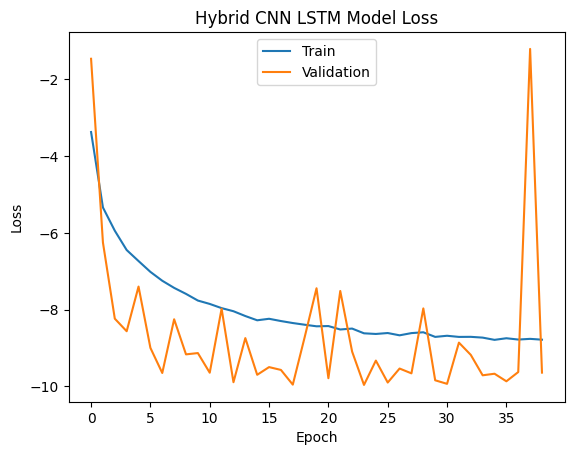

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, Dropout, LSTM, TimeDistributed, Masking
from keras.src.callbacks import EarlyStopping
from keras.src.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plotter
import time

input_shape = (30,4096)
conv_layer1= 64
kernel_size1= 3
activ1= 'relu'
dropout1= 0.2
conv_layer2= 128
kernel_size2= 9
activ2= 'relu'
dropout2= 0.2
lstm_dim= 50
activ3= 'tanh'
dropout3= 0.2
dropout4= 0.2

cnn_lstm_model = Sequential(layers=[
        Input(shape=input_shape),
        Masking(mask_value=0),
        Conv1D(conv_layer1, kernel_size1, activation=activ1, padding="same"),
        BatchNormalization(),
        Dropout(dropout1),

        Conv1D(conv_layer2, kernel_size2, activation=activ2, padding="same"),
        BatchNormalization(),
        Dropout(dropout2),

        LSTM(lstm_dim, activation=activ3, return_sequences=True, dropout=dropout3, recurrent_dropout=dropout4),
        TimeDistributed(Dense(1)),
    ])

cnn_lstm_model.compile(optimizer=Nadam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
start = time.time()

if os.path.exists('cnn_lstm_model-BEST.keras') and False:
    cnn_lstm_model = load_model('cnn_lstm_model-BEST.keras')
else:
  model_history = cnn_lstm_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])
  print("%ss" % (time.time() - start))

  plotter.plot(model_history.history['loss'])
  plotter.plot(model_history.history['val_loss'])
  plotter.title("Hybrid CNN LSTM Model Loss")
  plotter.xlabel("Epoch")
  plotter.ylabel("Loss")
  plotter.legend(['Train', 'Validation'])
  plotter.show()
  
  plotter.plot(np.log(model_history.history['log-loss']))
  plotter.plot(np.log(model_history.history['val_loss']))
  plotter.title("Hybrid CNN LSTM Model Log-Loss")
  plotter.xlabel("Epoch")
  plotter.ylabel("Log-Loss")
  plotter.legend(['Train', 'Validation'])
  plotter.show()